In [42]:
import os

import numpy as np
import matplotlib.pyplot as plt

from ase.utils.forcecurve import fit_images
from scipy.interpolate import interp1d

from ase.io import read
from ase.neb import NEB

from ase.calculators.lammpslib import LAMMPSlib

def make_ML_calc(potentails_folder="../potentials",
                 pot_name="W_milady"):

    pot_files = [f"{pot_name}.snapcoeff", f"{pot_name}.snapparam"]
    pot_paths = [os.path.join(potentails_folder, pot_file) for pot_file in pot_files]
    pot_path = " ".join(pot_paths)

    ML_calc = LAMMPSlib(lmpcmds=["pair_style snap",
                                 "pair_coeff * * %s W" % pot_path],
                        atom_types={'W': 1}, keep_alive=True)
    return ML_calc

def plot_neb(images, ax=None, label="", show=True):
    
    if ax is None:
        fig, ax = plt.subplots()
    
    force_fit = fit_images(images)
    
    ax.scatter(force_fit.path / force_fit.path[-1], force_fit.energies)
    ax.plot(force_fit.fit_path / force_fit.path[-1], force_fit.fit_energies)

    color = ax.get_lines()[-1].get_color()
    handle, = ax.plot([], [], "-o", color=color, label=label)
        
    if show:
        ax.legend()
        ax.set_ylabel("Energy (eV)")
        ax.set_xlabel("Normalised NEB path")
    else:
        return handle


def plot_potential_results(potential_label="Lam0_500_LamS_1", xyz_folder="../tests", database_label="", axes=None):
    
    lml_neb_images = read("../data_files/ML_vac_migration_images/milady_lml_vac_mig_images.xyz", index=":")
    
    show = False
    if ax is None:
        fig, axes = plt.subplots(figsize=(15, 6))
        show=True
    
    for dislocation_name in ["Junction100", "Junction110", "Screw"]:
        
        calculator = make_ML_calc(potentails_folder=f"../potentials/{potential_label}/", 
                                  pot_name=f"qSNAP{dislocation_name}{database_label}_{potential_label}")
        reevaluate_images = lml_neb_images.copy()
        for image in reevaluate_images:
            image.calc = calculator
                
        plot_neb(reevaluate_images, label=dislocation_name, ax=axes[0])
        
        images = read(xyz_folder + f"qSNAP{dislocation_name}{database_label}_{potential_label}_vac_mig_images.xyz", index=":")
        
        plot_neb(images, ax=axes[1], label=dislocation_name)
    
    if show:
        fig.suptitle(f"{potential_label} {database_label} potentials")
        return fig

In [43]:
lml_neb_images = read("../data_files/ML_vac_migration_images/milady_lml_vac_mig_images.xyz", index=":")

# Vacancy migration barrier


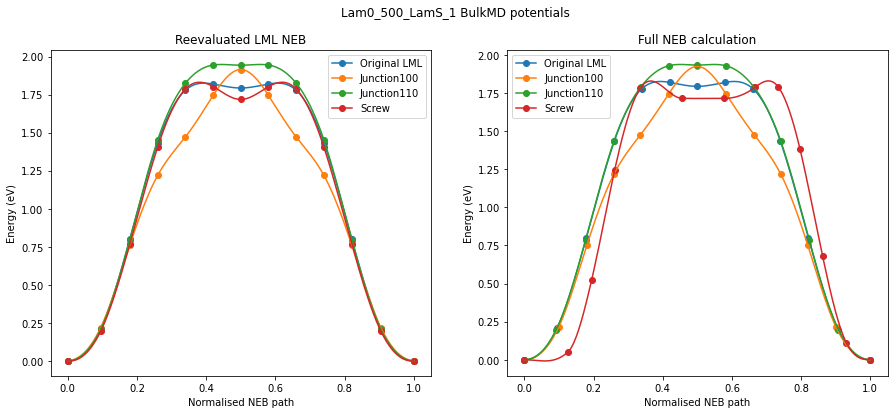

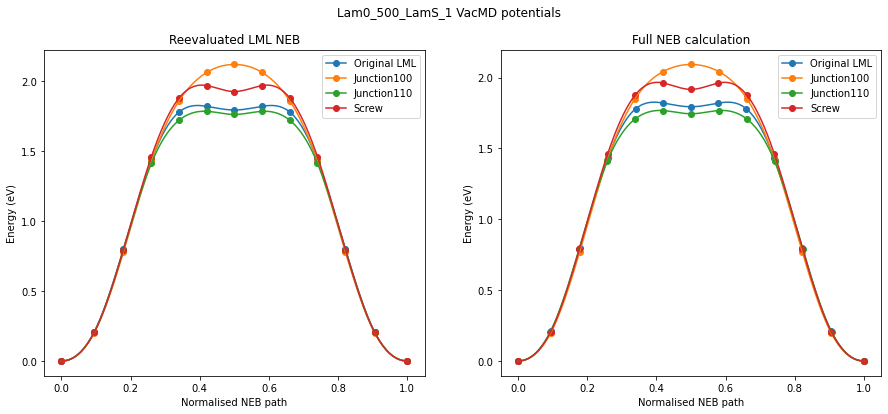

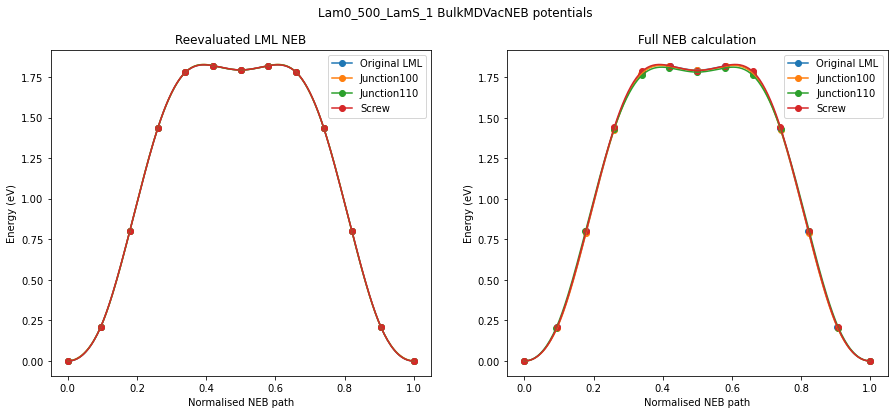

In [4]:
potential_label="Lam0_500_LamS_1"
for database_label in ["BulkMD", "VacMD", "BulkMDVacNEB"]:
    fig, axes = plt.subplots(figsize=(15, 6), ncols=2)
    for ax in axes:
        plot_neb(lml_neb_images, label="Original LML", ax=ax)
    
    plot_potential_results(potential_label=potential_label, xyz_folder="../data_files/ML_vac_migration_images/", 
                           database_label=database_label, axes=axes)
    axes[0].set_title("Reevaluated LML NEB")
    axes[1].set_title("Full NEB calculation")
    fig.suptitle(f"{potential_label} {database_label} potentials")

# Vac-Junction110 segragation retrained potential

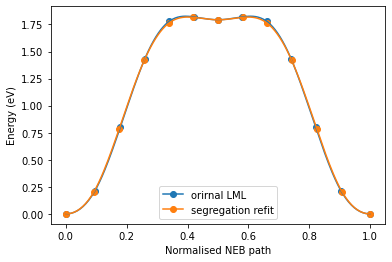

In [52]:
fig, ax = plt.subplots()
lml_neb_images = read("../data_files/ML_vac_migration_images/milady_lml_vac_mig_images.xyz", index=":")
plot_neb(lml_neb_images, ax=ax, label="orirnal LML")
seg_images = read("../data_files/ML_vac_migration_images/qSNAPJunction110BulkMDVacNEBSegregation_Lam0_500_LamS_1_vac_mig_images.xyz", index=":")
plot_neb(seg_images, ax=ax, label="segregation refit")

# Supplementary materials figures

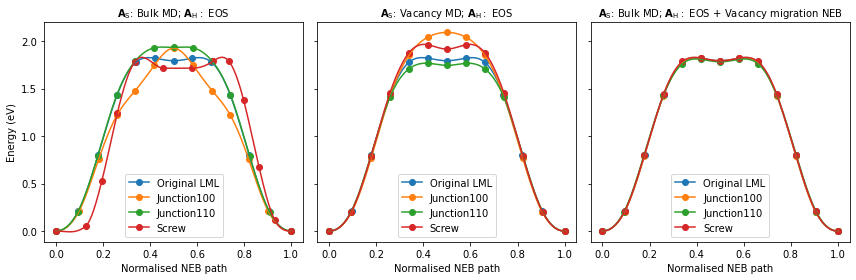

In [58]:
axes_labels = [r"${\bf A}_{\rm S}$: Bulk MD; ${\bf A}_{\rm H}:$ EOS",
               r"${\bf A}_{\rm S}$: Vacancy MD; ${\bf A}_{\rm H}:$ EOS",
               r"${\bf A}_{\rm S}$: Bulk MD; ${\bf A}_{\rm H}:$ EOS + Vacancy migration NEB"]
    
potential_label="Lam0_500_LamS_1"
xyz_folder="../data_files/ML_vac_migration_images/"
fig, axes = plt.subplots(figsize=(12, 4), ncols=3, sharey=True)

for i, ax in enumerate(axes):
    plot_neb(lml_neb_images, label="Original LML", ax=ax)
    ax.set_title(axes_labels[i], fontsize=10)

for i, database_label in enumerate(["BulkMD", "VacMD", "BulkMDVacNEB"]):
    
    for dislocation_name in ["Junction100", "Junction110", "Screw"]:
        images = read(xyz_folder + f"qSNAP{dislocation_name}{database_label}_{potential_label}_vac_mig_images.xyz", index=":")
        plot_neb(images, ax=axes[i], label=dislocation_name)

for ax in axes[1:]:
    ax.set_ylabel(None)

for ax in axes:
    ax.legend(loc="lower center")
fig.tight_layout()

In [59]:
fig.savefig("SM_vacancy_migration_barrier.pdf")

In [5]:
import pandas as pd

# Vacancy formation energy

In [6]:
formation_energies = pd.read_csv("../data_files/vac_formation_energies.csv", index_col=0)
formation_energies
print(formation_energies.to_markdown())

|    | pot_name                                     |   vac_formen |
|---:|:---------------------------------------------|-------------:|
|  0 | milady_lml                                   |      3.16065 |
|  1 | qSNAPJunction110BulkMD_Lam0_500_LamS_1       |      3.58555 |
|  2 | qSNAPJunction110BulkMDVacNEB_Lam0_500_LamS_1 |      3.15576 |
|  3 | qSNAPJunction100BulkMDVacNEB_Lam0_500_LamS_1 |      3.14241 |
|  4 | qSNAPJunction100BulkMD_Lam0_500_LamS_1       |      3.01397 |
|  5 | qSNAPJunction110VacMD_Lam0_500_LamS_1        |      3.30579 |
|  6 | qSNAPScrewBulkMDVacNEB_Lam0_500_LamS_1       |      3.15015 |
|  7 | qSNAPJunction100VacMD_Lam0_500_LamS_1        |      2.82739 |
|  8 | qSNAPScrewBulkMD_Lam0_500_LamS_1             |      2.85009 |
|  9 | qSNAPScrewVacMD_Lam0_500_LamS_1              |      2.83486 |


In [7]:
formation_energies["pot_labels"] = formation_energies.pot_name.str.replace("qSNAP", "").str.replace("_Lam0_500_LamS_1", "")

In [68]:
import matplotlib as mpl

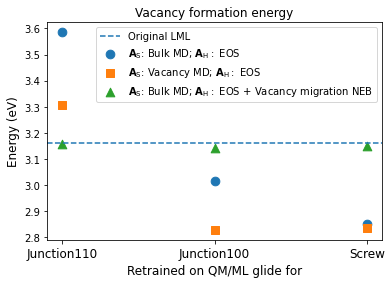

In [71]:
with mpl.rc_context({"xtick.labelsize": 12}):
    fig, ax = plt.subplots(figsize=(6., 4.))

    legend_labels = {"BulkMD": r"${\bf A}_{\rm S}$: Bulk MD; ${\bf A}_{\rm H}:$ EOS",
                     "VacMD":  r"${\bf A}_{\rm S}$: Vacancy MD; ${\bf A}_{\rm H}:$ EOS",
                     "BulkMDVacNEB": r"${\bf A}_{\rm S}$: Bulk MD; ${\bf A}_{\rm H}:$ EOS + Vacancy migration NEB"}

    markers = {"BulkMD": "o",
               "VacMD":  "s",
               "BulkMDVacNEB": "^"}

    for database_label in ["BulkMD_", "VacMD", "BulkMDVacNEB"]:

        mask = [database_label in label for label in formation_energies.pot_name]
        database_label = database_label.replace("_", "")
        ax.scatter(formation_energies[mask].pot_labels.str.replace(database_label, ""),
                   formation_energies[mask].vac_formen, label=legend_labels[database_label],
                   s=75, marker=markers[database_label])

    ax.axhline(formation_energies.iloc[0]["vac_formen"], linestyle="dashed", label="Original LML")

    ax.legend()

    ax.set_title("Vacancy formation energy", fontsize=12)
    ax.set_ylabel("Energy (eV)", fontsize=12)
    ax.set_xlabel("Retrained on QM/ML glide for", fontsize=12)


In [72]:
fig.savefig("SM_vacancy_formation_energy.pdf")